<a href="https://colab.research.google.com/github/rodela17/ORES-5160-02/blob/main/Importance_of_data_visualization_in_research_studies_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 11323 bytes


In [5]:
heart = pd.read_csv('heart.csv')

In [6]:
# check duplicated values
heart.duplicated().sum()

1

In [7]:
# drop duplicated values
heart.drop_duplicates(keep='first',inplace=True)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

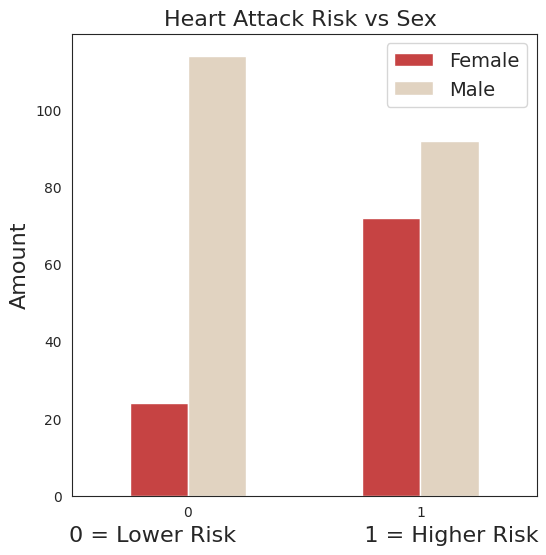

In [8]:
# Compare Heart Attack vs Sex
df = pd.crosstab(heart['output'],heart['sex'])

sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);

plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("0 = Lower Risk                  1 = Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)

In [12]:
fig = px.pie(heart,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )

# layout
fig.update_layout(title_text='Gender Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

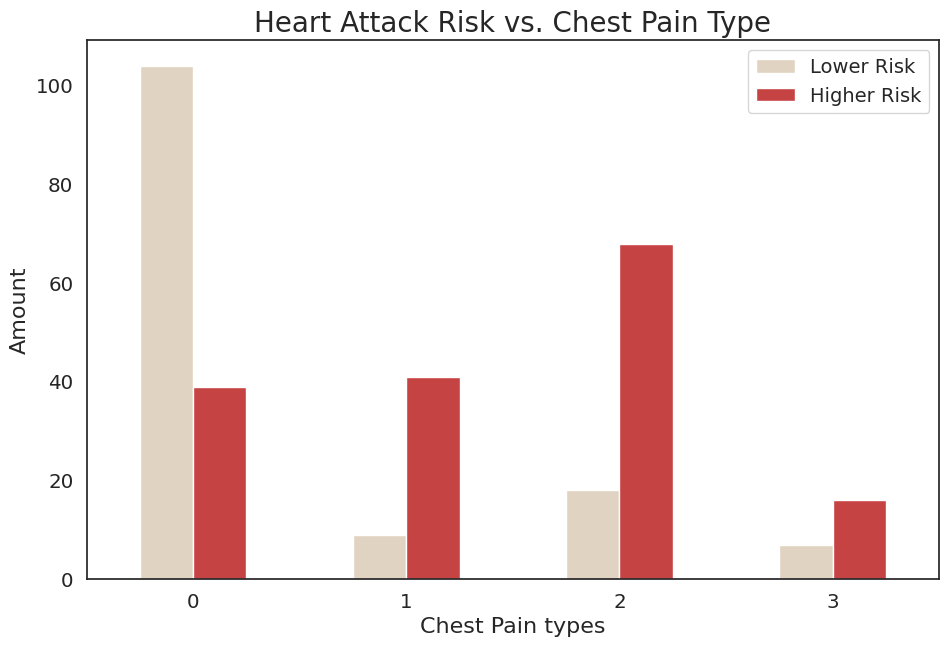

In [14]:
# Relation of Heart Attack with Chest Pain Type
df = pd.crosstab(heart['cp'], heart['output'])


# Make the crosstab more visual
sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(11,7),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);

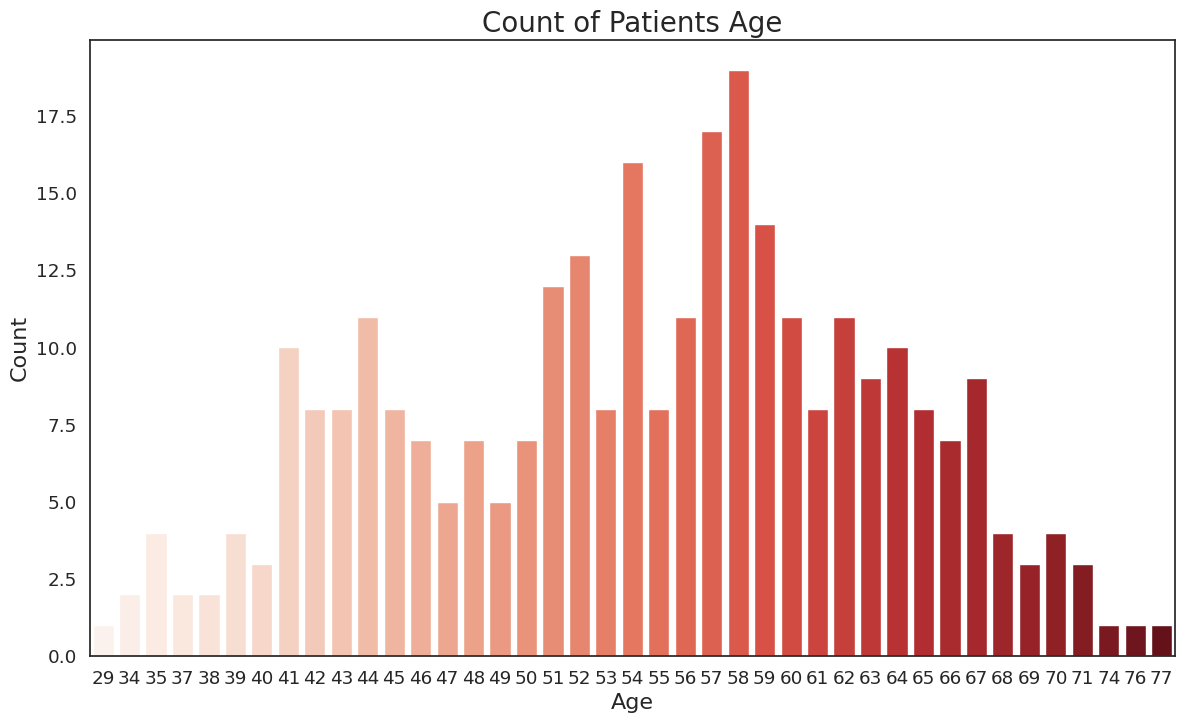

In [15]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

<ipython-input-16-299700edfb9e>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




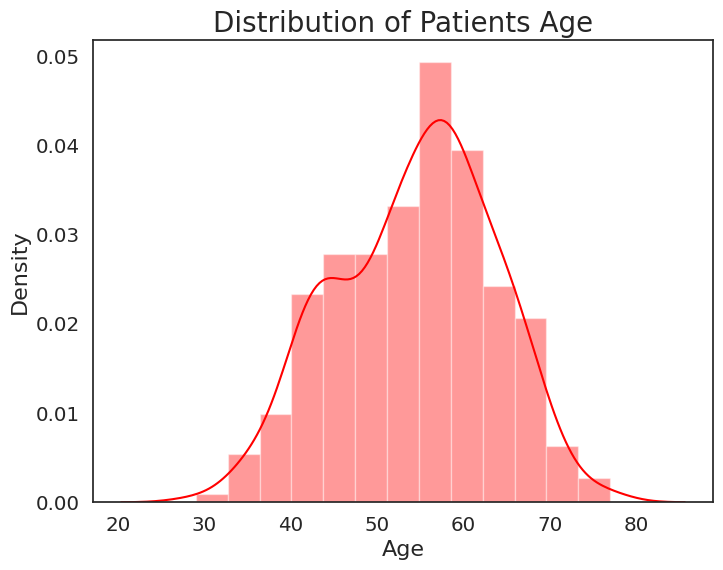

In [16]:
# age based analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

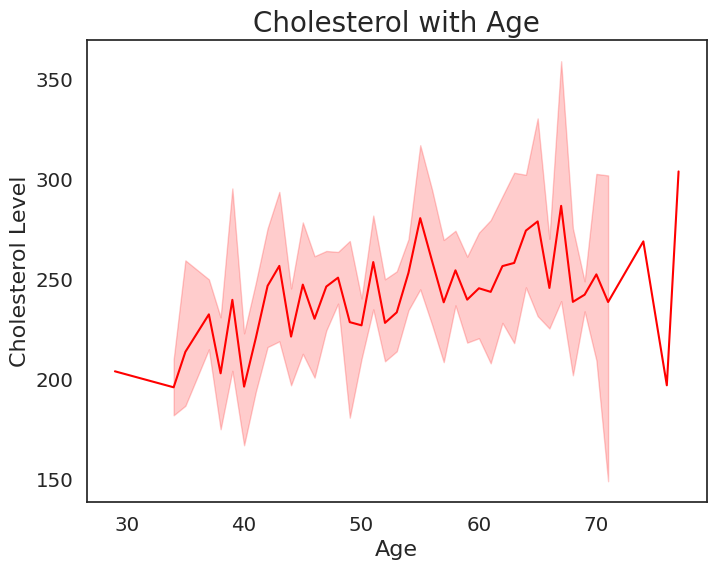

In [17]:
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")

plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)
plt.show()

<ipython-input-18-bf259f70d503>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-bf259f70d503>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




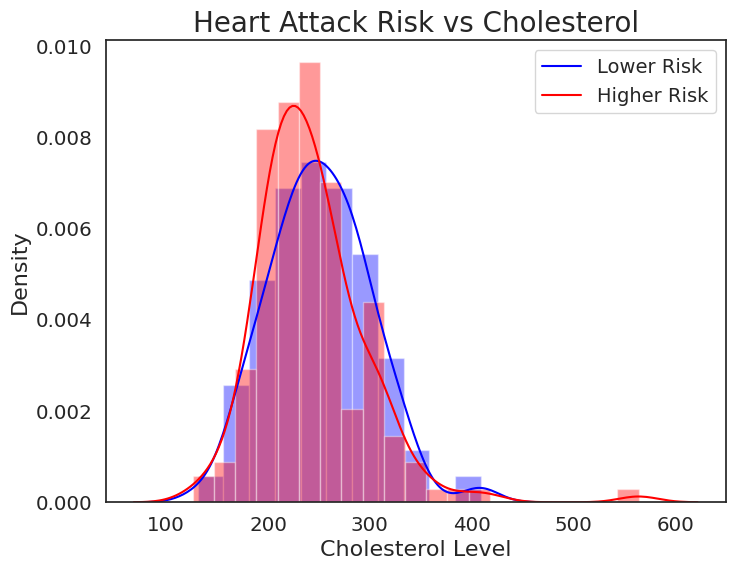

In [18]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart[heart["output"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["chol"],
             color="red")

plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()